<a href="https://colab.research.google.com/github/Principiante-en-Programacion-G8-ONE/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes/blob/main/TelecomX_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importaciones**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
url_datos = 'https://raw.githubusercontent.com/Principiante-en-Programacion-G8-ONE/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes/refs/heads/main/TelecomX_Data.json'

#üìå Extracci√≥n

In [12]:
# Importacion de datos
datos = pd.read_json(url_datos)
datos.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transformaci√≥n

In [13]:
# Normalizacion de datos
datos_normalizados = pd.concat([
    datos.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(datos['customer']),
    pd.json_normalize(datos['phone']),
    pd.json_normalize(datos['internet']),
    pd.json_normalize(datos['account'])
], axis=1)
datos_normalizados.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [14]:
# validacion de los tipos de datos
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [15]:
# Columnas y registros
print(f"\nCantidad de registros: {datos_normalizados.shape[0]}")
print(f"Cantidad de columnas: {datos_normalizados.shape[1]}")


Cantidad de registros: 7267
Cantidad de columnas: 21


In [16]:
# extraccion ded columnas relevantes
columnas_relevantes = [
    'customerID',
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Charges.Monthly',
    'Charges.Total'
]

datos_churn = datos_normalizados[columnas_relevantes]
datos_churn.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [17]:
# Inconsistencias en variables
categorical_cols = datos_churn.columns
for col in categorical_cols:
    print(f"\nValores √∫nicos en '{col}' ({len(datos_churn[col].unique())}): {datos_churn[col].unique()}")
    valores = datos_churn[col].astype(str).str.strip().unique()
    if len(valores) != len(datos_churn[col].unique()):
        print(f"  Atenci√≥n: posibles inconsistencias de espacios en '{col}'")


Valores √∫nicos en 'customerID' (7267): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores √∫nicos en 'Churn' (3): ['No' 'Yes' '']

Valores √∫nicos en 'gender' (2): ['Female' 'Male']

Valores √∫nicos en 'SeniorCitizen' (2): [0 1]

Valores √∫nicos en 'Partner' (2): ['Yes' 'No']

Valores √∫nicos en 'Dependents' (2): ['Yes' 'No']

Valores √∫nicos en 'tenure' (73): [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores √∫nicos en 'PhoneService' (2): ['Yes' 'No']

Valores √∫nicos en 'MultipleLines' (3): ['No' 'Yes' 'No phone service']

Valores √∫nicos en 'InternetService' (3): ['DSL' 'Fiber optic' 'No']

Valores √∫nicos en 'OnlineSecurity' (3): ['No' 'Yes' 'No internet service']

Valores √∫nicos en 'OnlineBackup' (3): ['Yes' 'No' 'No internet service']

Valores √∫nicos en 

In [18]:
#  Reemplazar por 'No' las filas que tienen 'No internet service' y 'No phone service'
cols_servicios = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_servicios:
    datos_churn[col] = datos_churn[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [19]:
# Validar registros vacios en churn
print(f"Registros con 'Churn' vac√≠o: {(datos_churn['Churn'] == '').sum()}")

Registros con 'Churn' vac√≠o: 224


In [20]:
#  Reemplazar '' por 'No'
datos_churn['Churn'] = datos_churn['Churn'].replace('', 'No')

In [21]:
#Duplicados
duplicados = datos_churn.duplicated().sum()
duplicados

np.int64(0)

In [22]:
# Valores unicos despues de limpieza
categorical_cols = datos_churn.columns
for col in categorical_cols:
    print(f"\nValores √∫nicos en '{col}' ({len(datos_churn[col].unique())}): {datos_churn[col].unique()}")
    valores = datos_churn[col].astype(str).str.strip().unique()
    if len(valores) != len(datos_churn[col].unique()):
        print(f"  Atenci√≥n: posibles inconsistencias de espacios en '{col}'")


Valores √∫nicos en 'customerID' (7267): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores √∫nicos en 'Churn' (2): ['No' 'Yes']

Valores √∫nicos en 'gender' (2): ['Female' 'Male']

Valores √∫nicos en 'SeniorCitizen' (2): [0 1]

Valores √∫nicos en 'Partner' (2): ['Yes' 'No']

Valores √∫nicos en 'Dependents' (2): ['Yes' 'No']

Valores √∫nicos en 'tenure' (73): [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores √∫nicos en 'PhoneService' (2): ['Yes' 'No']

Valores √∫nicos en 'MultipleLines' (2): ['No' 'Yes']

Valores √∫nicos en 'InternetService' (3): ['DSL' 'Fiber optic' 'No']

Valores √∫nicos en 'OnlineSecurity' (2): ['No' 'Yes']

Valores √∫nicos en 'OnlineBackup' (2): ['Yes' 'No']

Valores √∫nicos en 'DeviceProtection' (2): ['No' 'Yes']

Valores √∫nicos en 'TechSupp

In [23]:
## Conversion de tipo de dato
df = datos_churn.copy()
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Monthly'] = df['Charges.Monthly'].astype(float)
df['tenure'] = df['tenure'].astype(int)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
             'StreamingMovies', 'PaperlessBilling']

categoricas = [
    'gender', 'InternetService',  'Contract', 'PaymentMethod'
]
for col in categoricas:
    df[col] = df[col].astype('category')

df[cols_binarias] = df[cols_binarias].apply(lambda col: col.map({'Yes': 1, 'No': 0}).astype('int64'))

In [24]:
# se verifica si existen valores nulos en las columnas
print(f"Valores nulos en Charges.Total: {df['Charges.Total'].isna().sum()}")

Valores nulos en Charges.Total: 11


In [25]:
# Se eliminan los valores nulos
df.dropna(subset=['Charges.Total'], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7256 non-null   object  
 1   Churn             7256 non-null   int64   
 2   gender            7256 non-null   category
 3   SeniorCitizen     7256 non-null   int64   
 4   Partner           7256 non-null   int64   
 5   Dependents        7256 non-null   int64   
 6   tenure            7256 non-null   int64   
 7   PhoneService      7256 non-null   int64   
 8   MultipleLines     7256 non-null   int64   
 9   InternetService   7256 non-null   category
 10  OnlineSecurity    7256 non-null   int64   
 11  OnlineBackup      7256 non-null   int64   
 12  DeviceProtection  7256 non-null   int64   
 13  TechSupport       7256 non-null   int64   
 14  StreamingTV       7256 non-null   int64   
 15  StreamingMovies   7256 non-null   int64   
 16  Contract          7256 non-nu

In [27]:
df.head()

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0  Female              0        1           1       9   
1  0003-MKNFE      0    Male              0        0           0       9   
2  0004-TLHLJ      1    Male              0        0           0       4   
3  0011-IGKFF      1    Male              1        1           0      13   
4  0013-EXCHZ      1  Female              1        1           0       3   

   PhoneService  MultipleLines InternetService  ...  OnlineBackup  \
0             1              0             DSL  ...             1   
1             1              1             DSL  ...             0   
2             1              0     Fiber optic  ...             0   
3             1              0     Fiber optic  ...             1   
4             1              0     Fiber optic  ...             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            1            1                0   
1                 0            0            0                1   
2                 1            0            0                0   
3                 1            0            1                1   
4                 0            1            1                0   

         Contract PaperlessBilling     PaymentMethod Charges.Monthly  \
0        One year                1      Mailed check            65.6   
1  Month-to-month                0      Mailed check            59.9   
2  Month-to-month                1  Electronic check            73.9   
3  Month-to-month                1  Electronic check            98.0   
4  Month-to-month                1      Mailed check            83.9   

   Charges.Total  
0         593.30  
1         542.40  
2         280.85  
3        1237.85  
4         267.40  

[5 rows x 21 columns]

In [28]:
# Gasto promedio diario basado en facturaci√≥n mensual (asumiendo 30 d√≠as por mes)
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [29]:
# Gasto promedio diario acumulado desde el inicio del contrato
# Nota: tenure = meses de contrato, multiplicamos por 30 d√≠as para obtener d√≠as totales
tenure_dias = df['tenure'].replace(0, 1) * 30
df['Cuentas_Diarias_Acumulado'] = df['Charges.Total'] / tenure_dias

df[['Charges.Monthly', 'Cuentas_Diarias', 'Charges.Total', 'tenure', 'Cuentas_Diarias_Acumulado']].head()

Charges.Monthly  Cuentas_Diarias  Charges.Total  tenure  \
0             65.6         2.186667         593.30       9   
1             59.9         1.996667         542.40       9   
2             73.9         2.463333         280.85       4   
3             98.0         3.266667        1237.85      13   
4             83.9         2.796667         267.40       3   

   Cuentas_Diarias_Acumulado  
0                   2.197407  
1                   2.008889  
2                   2.340417  
3                   3.173974  
4                   2.971111

In [30]:
# Diccionario para renombrar columnas
renombrar_cols = {
    'customerID': 'ID_Cliente',
    'Churn': 'Abandono',
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'MultiplesLineas',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPeliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'FacturaElectronica',
    'PaymentMethod': 'MetodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'Cuentas_Diarias': 'GastoDiarioMensual',
    'Cuentas_Diarias_Acumulado': 'GastoDiarioAcumulado'
}
df.rename(columns=renombrar_cols, inplace=True)

# Convertir variables binarias Yes/No a 1/0
binarias = [
           'SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico',
           'StreamingTV', 'StreamingPeliculas', 'FacturaElectronica']
booleaanas = ['Abandono', 'AdultoMayor', 'Pareja', 'Dependientes', 'ServicioTelefonico', 'MultiplesLineas', ]

In [31]:
df.head(2)

ID_Cliente  Abandono  Genero  AdultoMayor  Pareja  Dependientes  \
0  0002-ORFBO         0  Female            0       1             1   
1  0003-MKNFE         0    Male            0       0             0   

   Meses_Contrato  ServicioTelefonico  MultiplesLineas ServicioInternet  ...  \
0               9                   1                0              DSL  ...   
1               9                   1                1              DSL  ...   

   SoporteTecnico  StreamingTV  StreamingPeliculas        Contrato  \
0               1            1                   0        One year   
1               0            0                   1  Month-to-month   

   FacturaElectronica    MetodoPago CargoMensual  CargoTotal  \
0                   1  Mailed check         65.6       593.3   
1                   0  Mailed check         59.9       542.4   

  GastoDiarioMensual  GastoDiarioAcumulado  
0           2.186667              2.197407  
1           1.996667              2.008889  

[2 rows x 23 columns]

In [32]:
# Se traducen los valores a espa√±ol
df['Genero'] = df['Genero'].map({'Male': 'Masculino', 'Female': 'Femenino'})

df['Contrato'] = df['Contrato'].map({
    'Month-to-month': 'Mes a mes',
    'One year': 'Un a√±o',
    'Two year': 'Dos a√±os'
})

In [33]:
# Se traducen los valores a espa√±ol
df['MetodoPago'] = df['MetodoPago'].map({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electr√≥nico',
    'Credit card (automatic)': 'Tarjeta de cr√©dito (autom√°tico)',
    'Bank transfer (automatic)': 'Transferencia bancaria (autom√°tico)'
})

In [34]:
df['MetodoPago'].unique()

['Cheque enviado por correo', 'Cheque electr√≥nico', 'Tarjeta de cr√©dito (autom√°tico)', 'Transferencia bancaria (autom√°tico)']
Categories (4, object): ['Transferencia bancaria (autom√°tico)', 'Tarjeta de cr√©dito (autom√°tico)', 'Cheque electr√≥nico',
                         'Cheque enviado por correo']

In [35]:
df.head()

ID_Cliente  Abandono     Genero  AdultoMayor  Pareja  Dependientes  \
0  0002-ORFBO         0   Femenino            0       1             1   
1  0003-MKNFE         0  Masculino            0       0             0   
2  0004-TLHLJ         1  Masculino            0       0             0   
3  0011-IGKFF         1  Masculino            1       1             0   
4  0013-EXCHZ         1   Femenino            1       1             0   

   Meses_Contrato  ServicioTelefonico  MultiplesLineas ServicioInternet  ...  \
0               9                   1                0              DSL  ...   
1               9                   1                1              DSL  ...   
2               4                   1                0      Fiber optic  ...   
3              13                   1                0      Fiber optic  ...   
4               3                   1                0      Fiber optic  ...   

   SoporteTecnico  StreamingTV  StreamingPeliculas   Contrato  \
0               1            1                   0     Un a√±o   
1               0            0                   1  Mes a mes   
2               0            0                   0  Mes a mes   
3               0            1                   1  Mes a mes   
4               1            1                   0  Mes a mes   

   FacturaElectronica                 MetodoPago CargoMensual  CargoTotal  \
0                   1  Cheque enviado por correo         65.6      593.30   
1                   0  Cheque enviado por correo         59.9      542.40   
2                   1         Cheque electr√≥nico         73.9      280.85   
3                   1         Cheque electr√≥nico         98.0     1237.85   
4                   1  Cheque enviado por correo         83.9      267.40   

  GastoDiarioMensual  GastoDiarioAcumulado  
0           2.186667              2.197407  
1           1.996667              2.008889  
2           2.463333              2.340417  
3           3.266667              3.173974  
4           2.796667              2.971111  

[5 rows x 23 columns]

#üìä Carga y an√°lisis

In [36]:
# Estad√≠sticas descriptivas para variables num√©ricas
numericas = ['Meses_Contrato', 'CargoMensual', 'GastoDiarioMensual', 'GastoDiarioAcumulado']
df[numericas].describe().T

count       mean        std        min        25%  \
Meses_Contrato        7256.0  32.395535  24.558067   1.000000   9.000000   
CargoMensual          7256.0  64.755423  30.125739  18.250000  35.450000   
GastoDiarioMensual    7256.0   2.158514   1.004191   0.608333   1.181667   
GastoDiarioAcumulado  7256.0   2.158564   1.007442   0.459167   1.191667   

                            50%        75%         max  
Meses_Contrato        29.000000  55.000000   72.000000  
CargoMensual          70.300000  89.900000  118.750000  
GastoDiarioMensual     2.343333   2.996667    3.958333  
GastoDiarioAcumulado   2.341667   3.005985    4.046667

In [37]:
# Mediana
df[numericas].median()

Meses_Contrato          29.000000
CargoMensual            70.300000
GastoDiarioMensual       2.343333
GastoDiarioAcumulado     2.341667
dtype: float64

In [38]:
# Estad√≠sticas para variables
categoricas = df.columns.tolist()
categoricas += ['Abandono']

for col in categoricas:
    print(f"Variable: {col} \n")
    print(df[col].value_counts(normalize=True, dropna=False).to_frame('Proporci√≥n'))
    print("=============================\n\n")

Variable: ID_Cliente 

            Proporci√≥n
ID_Cliente            
9995-HOTOH    0.000138
0002-ORFBO    0.000138
0003-MKNFE    0.000138
0004-TLHLJ    0.000138
0011-IGKFF    0.000138
...                ...
0018-NYROU    0.000138
0017-IUDMW    0.000138
0017-DINOC    0.000138
0016-QLJIS    0.000138
0015-UOCOJ    0.000138

[7256 rows x 1 columns]


Variable: Abandono 

          Proporci√≥n
Abandono            
0            0.74242
1            0.25758


Variable: Genero 

           Proporci√≥n
Genero               
Masculino     0.50565
Femenino      0.49435


Variable: AdultoMayor 

             Proporci√≥n
AdultoMayor            
0                0.8371
1                0.1629


Variable: Pareja 

        Proporci√≥n
Pareja            
0           0.5164
1           0.4836


Variable: Dependientes 

              Proporci√≥n
Dependientes            
0               0.700937
1               0.299063


Variable: Meses_Contrato 

                Proporci√≥n
Meses_Contrato            
1

In [39]:
#  Gr√°fico de barras con Seaborn + Matplotlib
def grafico_barras_abandono():
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x='Abandono', hue='Abandono', palette='Set2', legend=False)
  plt.xticks([0,1], ['Permanecieron', 'Evadieron'])
  plt.title('Distribuci√≥n de Clientes por Abandono')
  plt.ylabel('N√∫mero de Clientes')
  plt.xlabel('Estado de Abandono')
  return plt

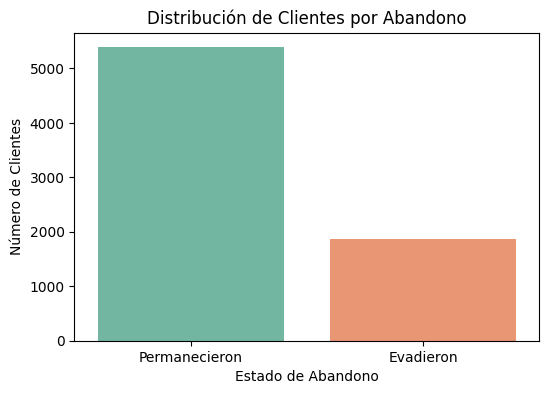

In [40]:
grafico_barras_abandono().show()

In [41]:
def grafico_pastel_abandono():
  labels = ['Permanecieron', 'Abandonaron']
  sizes = df['Abandono'].value_counts().sort_index()

  plt.figure(figsize=(6,6))
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
  plt.title('Proporci√≥n de Clientes por Abandono')
  return plt

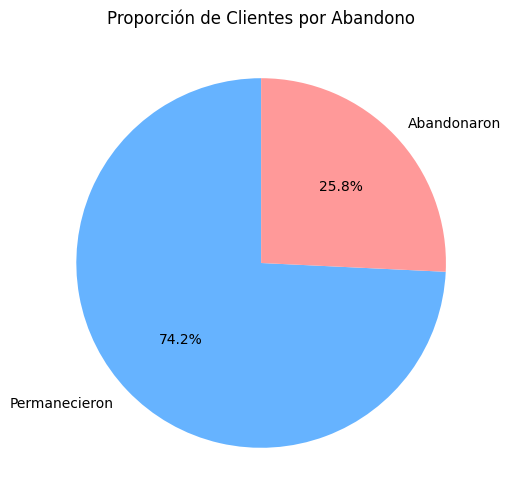

In [42]:
grafico_pastel_abandono().show()

In [43]:
# Se obtienen la categorias de interes para generar graficos
categoricas_interes = ['Genero', 'Contrato', 'MetodoPago', 'ServicioInternet', 'ServicioTelefonico', 'MultiplesLineas',
                       'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas']

for col in categoricas_interes:
    tabla = pd.crosstab(df[col], df['Abandono'], normalize='index')
    print(f"Distribuci√≥n de Abandono seg√∫n {col}:\n")
    print(tabla)
    print("=====================================================\n")

Distribuci√≥n de Abandono seg√∫n Genero:

Abandono          0         1
Genero                       
Femenino   0.738221  0.261779
Masculino  0.746525  0.253475

Distribuci√≥n de Abandono seg√∫n Contrato:

Abandono          0         1
Contrato                     
Mes a mes  0.586767  0.413233
Un a√±o     0.890646  0.109354
Dos a√±os   0.972302  0.027698

Distribuci√≥n de Abandono seg√∫n MetodoPago:

Abandono                                    0         1
MetodoPago                                             
Transferencia bancaria (autom√°tico)  0.837429  0.162571
Tarjeta de cr√©dito (autom√°tico)      0.851946  0.148054
Cheque electr√≥nico                   0.561963  0.438037
Cheque enviado por correo            0.814122  0.185878

Distribuci√≥n de Abandono seg√∫n ServicioInternet:

Abandono                 0         1
ServicioInternet                    
DSL               0.815143  0.184857
Fiber optic       0.594434  0.405566
No                0.928254  0.071746

Distribuci√≥n d

In [44]:
# Se generan los graficos de las columnas de interes
def grafico_intractivo(categoricas_interes):
    map_abandono = {0: "Permanecieron", 1: "Abandonaron"}
    map_binario = {0: "No Contratado", 1: "Contratado"}
    map_adultomayor = {0: "No", 1: "S√≠"}

    for col in categoricas_interes:
        if col == 'AdultoMayor':
            x_values = df[col].map(map_adultomayor)
            category_order = ["No", "S√≠"]
        elif set(df[col].dropna().unique()) <= {0, 1}:
            x_values = df[col].map(map_binario)
            category_order = ["No Contratado", "Contratado"]
        else:
            x_values = df[col]
            category_order = sorted(df[col].unique())

        color_values = df['Abandono'].map(map_abandono)

        fig = px.histogram(
            x=x_values,
            color=color_values,
            barmode='stack',
            category_orders={"x": category_order},
            color_discrete_map={
                "Permanecieron": '#66b3ff',
                "Abandonaron": '#ff9999'
            },
            title=f'Abandono seg√∫n {col}'
        )
        fig.update_layout(
            yaxis_title='N√∫mero de Clientes',
            xaxis_title=col,
            xaxis={'categoryorder': 'array', 'categoryarray': category_order}
        )
        fig.show()

In [45]:
grafico_intractivo(['Genero', 'Contrato', 'MetodoPago', 'ServicioInternet', 'ServicioTelefonico', 'MultiplesLineas',
                       'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas'])

In [46]:
# Generacion de graficos con Tipos de cargo
def grafico_tipo_cargo():
  map_abandono = {0: "Permanecieron", 1: "Abandonaron"}
  df['Estado Abandono'] = df['Abandono'].map(map_abandono)

  variables_numericas = [
      'CargoMensual', 'CargoTotal',
      'Meses_Contrato', 'GastoDiarioMensual',
      'GastoDiarioAcumulado'
  ]

  for var in variables_numericas:
    data_filtrada = df[[var, 'Estado Abandono']].dropna()

    plt.figure(figsize=(10,5))
    sns.kdeplot(
        data=data_filtrada,
        x=var,
        hue='Estado Abandono',
        common_norm=False,
        fill=True,
        alpha=0.5
        )
    plt.title(f'Distribuci√≥n de {var} por estado de abandono', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.show()

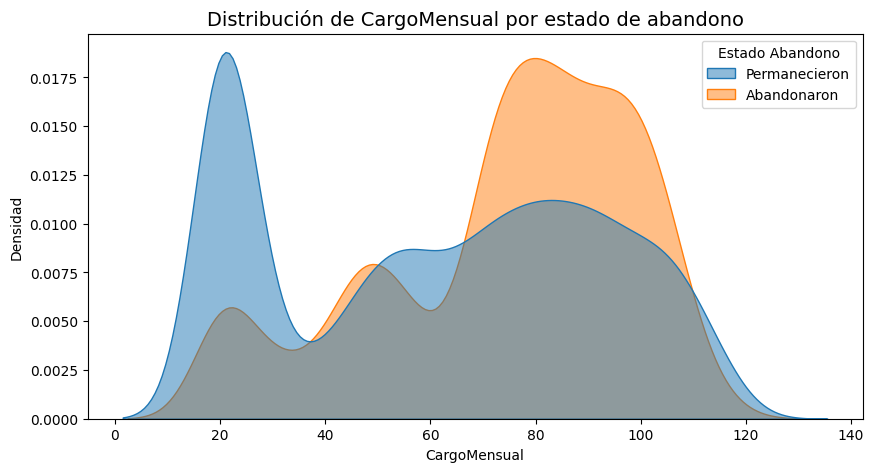

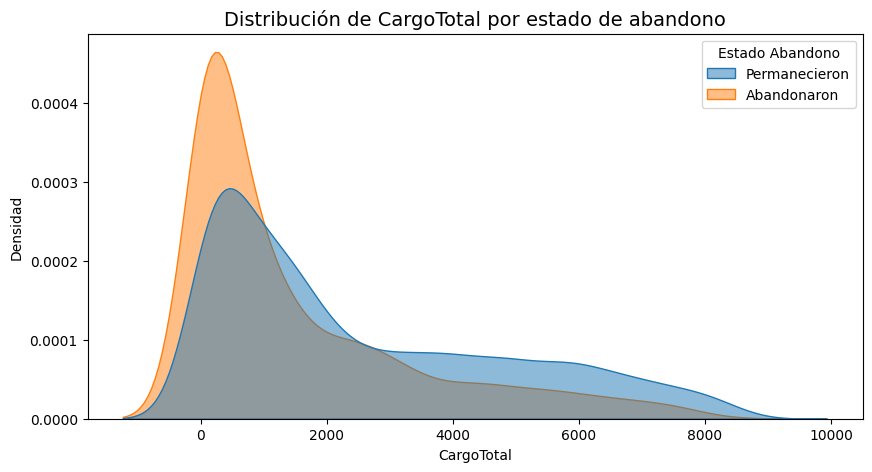

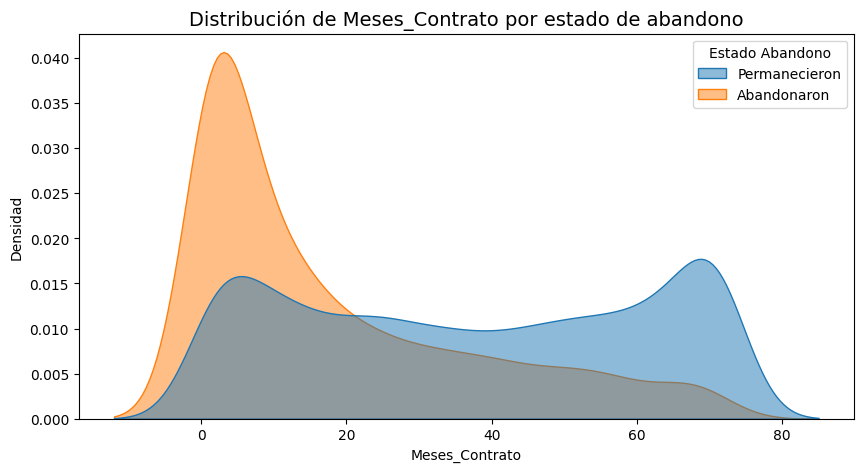

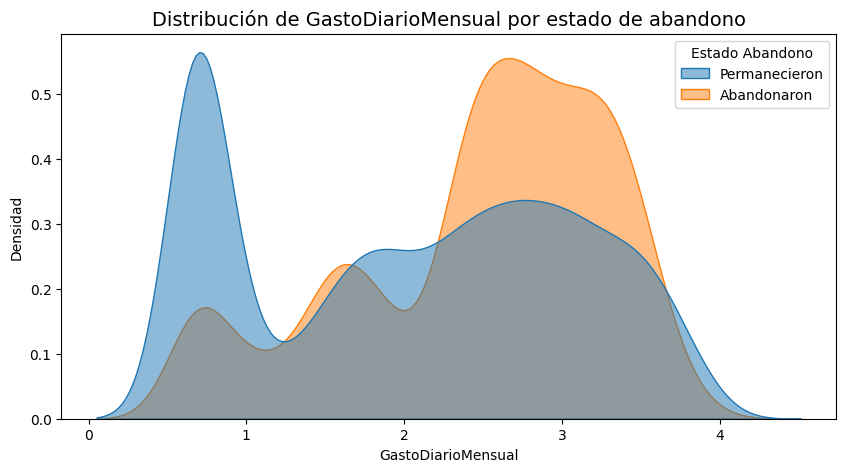

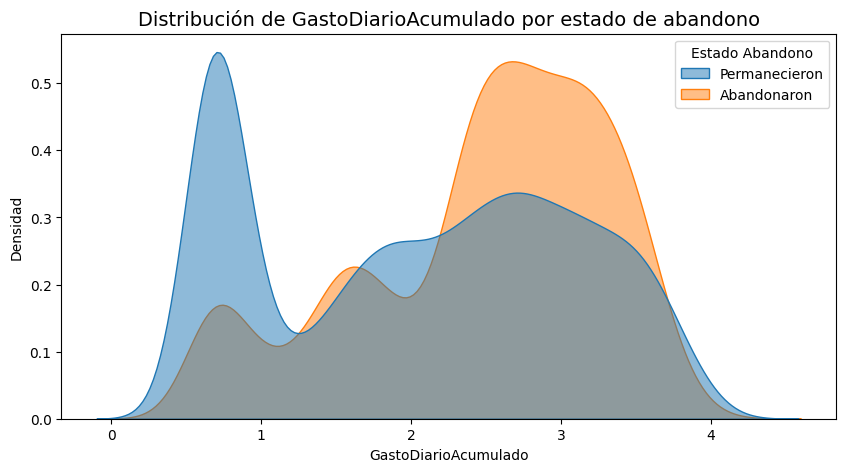

In [47]:
grafico_tipo_cargo()

#üìÑInforme final

## Introducci√≥n

El objetivo principal de este an√°lisis es comprender los factores que influyen en la evasi√≥n de clientes dentro de Telecom Latam. La evasi√≥n de clientes ocurre cuando un usuario decide cancelar su contrato o cambiarse a la competencia, lo que impacta directamente en los ingresos y la rentabilidad.
El prop√≥sito del estudio es identificar patrones y caracter√≠sticas comunes entre los clientes que han abandonado la empresa, con el fin de implementar estrategias preventivas que reduzcan la tasa de evasi√≥n y aumente la retencion.

## Limpieza y tratamiento de datos

Para garantizar la calidad del an√°lisi, se realizaron los siguientes pasos:


---


1. Importaci√≥n de datos
* Los datos se importaron directamente desde un repositorio de HitHub mediante una URL.
* El archivo estaba en formato JSON, por lo que se realizo un proceso de normalizaci√≥n para estructurarlo en un DataFrame.


---


2. Revisi√≥n incial y selecci√≥n de columnas relevantes
*   Uso de `info()` para identificar cantidad de registros, columnas y tipo de datos inciales (todos ebn formato `object`).
*   Se seleccionaron √∫nicamnete las variables necesarias para el an√°lisis.


---


3. Conversi√≥n de tipos de datos
*   Tranformaci√≥n de columnas a su tupo de dato correcto (`int`, `float`, `bool`) para optimizar c√°culos.


---


4. Tratamiento de valores nulos vac√≠os
*   Visualizaci√≥n de valores nulos.
*   Eliminaci√≥n de registros incompletos.
*   Revisi√≥n y sustituci√≥n de valos vac√≠os (`''`) poe un valor segun el contexto, como `No`.


---


5. Estandarizaci√≥n y consistencia de valores
*   Normalizaci√≥n de categor√≠as con variaciones textuales (ejemplo: `"No phone service` ‚Üí `No`).
*   Revisi√≥n de valores √∫nicos en cada columna para eliminar inconsistencias.
*   Conversi√≥n de variables categ√≥ricas binarias (`YES/NO`) a valores (`1/0`).


---


6. Revisi√≥n de duplicados
*   Validaci√≥n de registros √∫nicos para evitar sesgos en el an√°liss.


---


7. Ajustes  adicionales
*   Renombrado de columnas para mayor legibilidad para personas no t√©cnicas.
*   Traducci√≥n de nombres de columnas y categor√≠as al espa√±ol.
*   C√°lculo de cuentas diarias y cuentas diarias acumuladas para identificar tendencias temporales.

## An√°lisis Exploratorio de datos

El an√°lisis exploratorio se centr√≥ en identificar patrones y relaciones entre las variables y la evasi√≥n de clientes:

#### Distribuci√≥n del churn: proporci√≥n de clientes que cancelaron frente a los que permanecieron

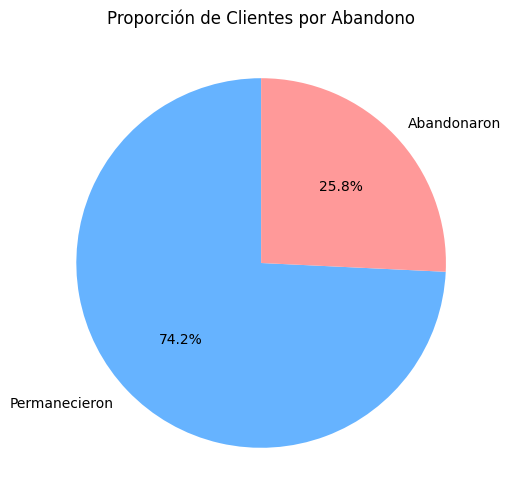

In [48]:
grafico_pastel_abandono().show()

#### Relaci√≥n entre Abandono y servicios contratado
Visualizaci√≥n de tasas de abandono seg√∫n servicios

In [49]:
grafico_intractivo(['ServicioInternet', 'ServicioTelefonico', 'MultiplesLineas', 'RespaldoOnline',
                    'SoporteTecnico', 'StreamingTV', 'StreamingPeliculas', 'SeguridadOnline',
                    'ProteccionDispositivo'])

#### An√°lisis por antig√ºedad del cliente: tendencia de cancelaciones seg√∫n el tiempo como cliente.

In [50]:
grafico_intractivo(['Contrato'])

#### Impacto de m√©todos de pago: c√≥mo influye el medio de pago en la permanencia.

In [51]:
grafico_intractivo(['MetodoPago'])

#### Impacto del genero y adultos mayores

In [52]:
grafico_intractivo(['Genero', 'AdultoMayor'])

Estas visualizaciones permitieron identifica sefmentos de clientes m√°s propensos a abandonar, as√≠ como variables con mayor correlaci√≥n con el churn.

### Conclusiones e Insights

* El abandono es mas alta en clientes con contratos mensuales, sin servicios adicionales.
* Los clientes adultos mayores tienen una menor tasa de evasi√≥n en comparaci√≥n con los m√°s j√≥venes.
* Un cargo mensual elevado sin beneficio adicionales percibidos incrementa la probabilidad de cancelaci√≥n.
* Los servicios de valor agregado como `SeguidadOnline` y `SoporteTecnico` parecen estar asociados con mayor fidelidad.


## Recomendaciones estrat√©gicas

1. **Incentivar contratos a largo plazo**

Ofrecer descuentos o beneficios adicionales para clientes que migren de contrato mensual a anual o bianual.

2. **Paquetes de servicios personalizados**

Combinar ServicioInternet con servicios de seguridad, respaldo o soporte t√©cnico para aumentar el valor percibido.

3. **Programas de fidelizaci√≥n temprana**

Atender a los clientes nuevos durante los primeros 6 meses para reducir el riesgo de cancelaci√≥n.

4. **Segmentaci√≥n de clientes en riesgo**

Implementar un modelo predictivo que identifique clientes con alto riesgo de evasi√≥n y aplicar campa√±as preventivas.

5. **Revisi√≥n de precios**

Ajustar el CargoMensual para que sea competitivo, especialmente para clientes con pocos servicios contratados.